In [1]:
from conllu import parse_incr, parse

data_file = open("/Users/madalina/Documents/M1TAL/stage_GC/Pro-TEXT_annotated_corpus_v0.3/conll_clean/P19C6E2_with_pause_clean.conll", "r", encoding="utf-8")
sentence = ""
data = []
for line in data_file:
    if line[0] == "\n":
        data.append(sentence)
        sentence = ""
    else:
        sentence = sentence + line
print(data[0])

# text_version=0
# sentence_id=1
# text = Je pense que la violence cela
1	Je	moi	PRON	_	Number=Sing|Person=1|PronType=Prs	2	nsubj	_	charID=1__char=J__charStatus=True__pause=na|charID=2__char=e__charStatus=True__pause=561
2	pense	penser	VERB	_	Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin	0	root	_	charID=4__char=p__charStatus=True__pause=328|charID=5__char=e__charStatus=True__pause=249|charID=6__char=n__charStatus=True__pause=343|charID=7__char=s__charStatus=True__pause=358|charID=8__char=e__charStatus=True__pause=140
3	que	que	SCONJ	_	None	5	case	_	charID=10__char=q__charStatus=True__pause=593|charID=11__char=u__charStatus=True__pause=187|charID=12__char=e__charStatus=True__pause=188
4	la	le	DET	_	Definite=Def|Gender=Fem|Number=Sing|PronType=Art	5	det	_	charID=14__char=l__charStatus=True__pause=421|charID=15__char=a__charStatus=True__pause=297
5	violence	violence	NOUN	_	Gender=Fem|Number=Sing	2	obj	_	charID=17__char=v__charStatus=True__pause=203|charID=18__char=i__charStatus=Tr

In [2]:
char_pause_dict = {}
for i in range(len(data)):
    element = data[i]
    parts = element.split("\n")
    for part in parts[2:]:
        misc = part.split("\n")[0].split("\t")[9] if len(part.split("\n")[0].split("\t")) > 1 else ""
        char_details = misc.split("|")
        for detail in char_details:
            fields = detail.split("__")
            char_id_list = [field.split('=')[1] for field in fields if field.startswith('charID')]
            pause_value_list = [field.split('=')[1] for field in fields if field.startswith('pause')]
            # Check if lists are not empty before accessing
            if char_id_list and pause_value_list:
                char_id = char_id_list[0]
                pause_value = pause_value_list[0]
                pause_value = 0 if pause_value == 'na' else int(pause_value)
                char_pause_dict[char_id] = pause_value
            # else:
            #     print(misc)

print(char_pause_dict)

{'1': 0, '2': 561, '4': 328, '5': 249, '6': 343, '7': 358, '8': 140, '10': 593, '11': 187, '12': 188, '14': 421, '15': 297, '17': 203, '18': 187, '19': 171, '20': 218, '21': 889, '22': 125, '23': 219, '24': 156, '26': 2496, '27': 655, '28': 141, '29': 608, '37': 1201, '39': 624, '40': 640, '41': 125, '42': 296, '44': 327, '46': 546, '47': 250, '49': 733, '50': 141, '51': 358, '52': 406, '53': 140, '55': 13494, '57': 218, '58': 140, '63': 795, '65': 374, '66': 156, '67': 203, '68': 78, '69': 687, '166': 968, '168': 1202, '169': 140, '172': 670, '173': 109, '232': 1887, '233': 1061, '235': 468, '271': 702, '483': 1389, '484': 592, '485': 702, '486': 1030, '487': 390, '489': 983, '490': 530, '491': 405, '492': 140, '493': 203, '495': 514, '496': 327, '498': 141, '499': 203, '501': 421, '502': 951, '503': 203, '504': 265, '506': 421, '507': 203, '508': 327, '509': 343, '511': 296, '512': 234, '514': 624, '515': 188, '516': 203, '517': 515, '519': 905, '520': 1264, '521': 312, '522': 2074, 

In [3]:
import pandas as pd

df = pd.DataFrame(char_pause_dict.items(), columns=['char_id', 'pause_value'])
df['x_axis'] = df['pause_value'].cumsum()
df['const'] = 1

print(df)


    char_id  pause_value  x_axis  const
0         1            0       0      1
1         2          561     561      1
2         4          328     889      1
3         5          249    1138      1
4         6          343    1481      1
..      ...          ...     ...    ...
466    1189          124  302559      1
467    1190          219  302778      1
468    1365           31  302809      1
469    1366        38860  341669      1
470    1370            0  341669      1

[471 rows x 4 columns]


In [4]:
import plotly.express as px

fig = px.scatter(df, x="x_axis", y="const")
fig.show()

In [5]:
with open ("sentences.txt", "w") as f:
    for i in range(len(data)):
        sent = ""
        sentence = data[i]
        sentence = parse(sentence)
        tokens = sentence[0]
        for token in tokens:
            sent = sent + str(token) + " "
        f.write(sent.strip() + "\n")


In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load("fr_core_news_sm")
with open ("sentences.txt", "r") as f:
    for line in f:
        print("====================================")
        doc = nlp(line)
        displacy.render(doc, style='dep')
        for token in doc:
            print(token.head.i, token.head)
            print("-----------------")

In [7]:
import stanza

nlp = stanza.Pipeline('fr', processors='tokenize, pos, lemma, depparse')
with open ("sentences.txt", "r") as f:
    for line in f:
        print("====================================")
        doc = nlp(line)
        print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

2024-07-09 11:31:03 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-07-09 11:31:03 INFO: Downloaded file to /Users/madalina/stanza_resources/resources.json
2024-07-09 11:31:03 WARNING: Language fr package default expects mwt, which has been added
2024-07-09 11:31:04 INFO: Loading these models for language: fr (French):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

2024-07-09 11:31:04 INFO: Using device: cpu
2024-07-09 11:31:04 INFO: Loading: tokenize
2024-07-09 11:31:04 INFO: Loading: mwt
2024-07-09 11:31:04 INFO: Loading: pos
2024-07-09 11:31:04 INFO: Loading: lemma
2024-07-09 11:31:04 INFO: Loading: depparse
2024-07-09 11:31:04 INFO: Done loading processors!


id: 1	word: Moi	head id: 4	head: aime	deprel: dislocated
id: 2	word: je	head id: 4	head: aime	deprel: nsubj
id: 3	word: n'	head id: 4	head: aime	deprel: advmod
id: 4	word: aime	head id: 0	head: root	deprel: root
id: 5	word: pas	head id: 4	head: aime	deprel: advmod
id: 6	word: ca	head id: 4	head: aime	deprel: obj
id: 7	word: la	head id: 8	head: violence	deprel: det
id: 8	word: violence	head id: 4	head: aime	deprel: obj
id: 9	word: parce	head id: 14	head: a	deprel: mark
id: 10	word: '	head id: 9	head: parce	deprel: punct
id: 11	word: que	head id: 14	head: a	deprel: mark
id: 12	word: il	head id: 14	head: a	deprel: expl:subj
id: 13	word: y	head id: 14	head: a	deprel: expl:comp
id: 14	word: a	head id: 4	head: aime	deprel: advcl
id: 15	word: une	head id: 16	head: attebn	deprel: det
id: 16	word: attebn	head id: 14	head: a	deprel: obj
id: 1	word: Moi	head id: 4	head: aime	deprel: dislocated
id: 2	word: je	head id: 4	head: aime	deprel: nsubj
id: 3	word: n'	head id: 4	head: aime	deprel: advmod
i

In [6]:
import stanza

nlp = stanza.Pipeline('fr', processors='tokenize, pos, lemma, depparse')
vectors = []
with open ("sentences.txt", "r") as f:
    for line in f:
        doc = nlp(line)
        for sent in doc.sentences:
            vectors.append([word.head for word in sent.words])

print(vectors)



with open ("vectors.txt", "w") as f:
    for hv in vectors:
        for number in hv:
            f.write(str(number))
            f.write("\t")
        f.write("\n")

2024-07-11 16:29:49 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-07-11 16:29:49 INFO: Downloaded file to /Users/madalina/stanza_resources/resources.json
2024-07-11 16:29:49 WARNING: Language fr package default expects mwt, which has been added
2024-07-11 16:29:50 INFO: Loading these models for language: fr (French):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

2024-07-11 16:29:50 INFO: Using device: cpu
2024-07-11 16:29:50 INFO: Loading: tokenize
2024-07-11 16:29:50 INFO: Loading: mwt
2024-07-11 16:29:50 INFO: Loading: pos
2024-07-11 16:29:50 INFO: Loading: lemma
2024-07-11 16:29:50 INFO: Loading: depparse
2024-07-11 16:29:50 INFO: Done loading processors!


[[2, 0, 5, 5, 2, 5], [2, 0, 5, 5, 2], [2, 0, 5, 5, 2, 7, 5], [2, 0, 5, 5, 2, 7, 5], [2, 0, 9, 5, 9, 5, 9, 9, 2, 11, 9], [2, 0, 9, 5, 9, 5, 9, 9, 2], [2, 0, 9, 5, 9, 5, 9, 9, 2, 11, 9, 2], [2, 0, 9, 6, 6, 9, 9, 9, 2, 11, 9], [2, 0, 9, 5, 9, 5, 9, 9, 2, 11, 9, 2], [2, 0, 9, 6, 6, 9, 9, 9, 2, 9], [2, 0, 9, 5, 9, 5, 9, 9, 2, 11, 9, 2], [2, 0, 9, 6, 6, 9, 9, 9, 2, 11, 9, 13, 11, 15, 13], [2, 0, 9, 5, 9, 5, 9, 9, 2, 11, 9, 2], [2, 0, 9, 6, 6, 9, 9, 9, 2, 11, 9, 13, 11, 2], [2, 0, 9, 5, 9, 5, 9, 9, 2, 11, 9, 2], [2, 0, 9, 9, 6, 9, 9, 9, 2, 11, 9, 13, 11, 13], [2, 0, 9, 5, 9, 5, 9, 9, 2, 11, 9, 2], [2, 0, 9, 9, 6, 9, 9, 9, 2, 11, 9, 13, 11, 13], [2, 0, 9, 5, 9, 5, 9, 9, 2, 11, 9, 2], [2, 0, 9, 6, 6, 9, 9, 9, 2, 11, 9, 13, 11, 13, 16, 13, 2], [2, 0, 7, 5, 7, 7, 2, 9, 7, 2], [2, 0, 9, 6, 6, 9, 9, 9, 2, 11, 9, 13, 11, 13, 16, 13, 2], [2, 0, 7, 5, 7, 7, 2, 9, 7, 2], [2, 0, 9, 6, 6, 9, 9, 9, 2, 11, 9, 13, 11, 13, 16, 13, 2], [2, 0, 7, 5, 7, 7, 2, 9, 7, 2], [2, 0, 9, 6, 6, 9, 9, 9, 2, 11, 9, 13, 11,

In [7]:
import lal_numbers
errlist = lal_numbers.io.check_correctness_treebank("vectors.txt")
for err in errlist:
    print(err)

In [8]:
list_hv = vectors
hv_hid = {}
total_list_mhd = []

head_initial_proportions = []
for i in range(len(list_hv)):
    dg = lal_numbers.graphs.from_head_vector_to_directed_graph(list_hv[i])
    ccs = lal_numbers.properties.compute_connected_components(dg)
    list_head_init = []
    for j in range(0, ccs.size()):
        if ccs[j].get_num_nodes() > 1: # error if only one node in the sentence
            rt = lal_numbers.graphs.rooted_tree(ccs[j])
            head_init = lal_numbers.linarr.head_initial(rt)
            list_head_init.append(head_init)
            head_initial_proportions.append(head_init)
        else:
            head_init = 0
            list_head_init.append(head_init)
            head_initial_proportions.append(head_init)
    hv_hid[i] = list_head_init


import plotly.express as px

fig = px.line(y=head_initial_proportions, title='Proportion of head initial dependencies', labels={'y': 'Proportion', 'x': 'Root'})

fig.show()

In [9]:
hv_mhd = {}
total_list_mhd = []
for h in range(len(list_hv)):
    dg = lal_numbers.graphs.from_head_vector_to_directed_graph(list_hv[h])
    ccs = lal_numbers.properties.compute_connected_components(dg)
    list_mhd = []
    for i in range(0, ccs.size()):
        if ccs[i].get_num_nodes() > 1: # error if only one node in the sentence
            rt = lal_numbers.graphs.rooted_tree(ccs[i])
            mhd = lal_numbers.properties.mean_hierarchical_distance(rt)
            list_mhd.append(mhd)
            total_list_mhd.append(mhd)
        else:
            mhd = 0
            list_mhd.append(mhd)
            total_list_mhd.append(mhd)
    hv_mhd[h] = list_mhd

import plotly.express as px

fig = px.line(y=total_list_mhd, title='Mean Hierarchical Distance', labels={'y': 'MHD', 'x': 'Root'})

fig.show()

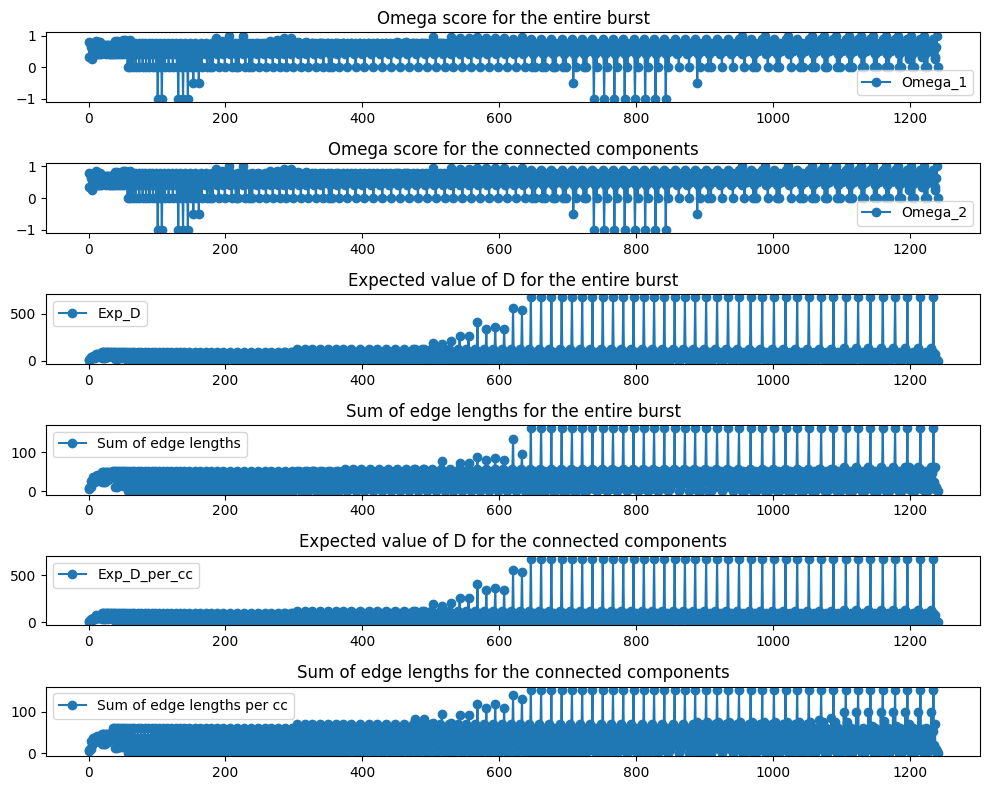

In [10]:
def tutorial(list_hv):
    info = []
    edge_lengths = []
    for hv in list_hv:

        dg = lal_numbers.graphs.from_head_vector_to_directed_graph(hv)
        n = dg.get_num_nodes()
        edge_length = 0
        for u in range(0, n):
            head = dg.get_in_neighbors(u)
            if len(head) == 1:
                gov = head[0]
                edge_length += abs(gov - u)
        edge_lengths.append(edge_length)

        #Dr_1 = the expected value of D we would find in a uniformly random permutation of the words in the sentence
        Dr_1 = lal_numbers.properties.exp_sum_edge_lengths(dg.to_undirected()) 
        Dr_2 = 0
        D = lal_numbers.linarr.sum_edge_lengths(dg)
        Dmin = 0
        Dr_2_actual = 0

        # ccs[0], ccs[1]
        ccs = dg.get_connected_components()
        for cc in ccs:
            rt = lal_numbers.graphs.rooted_tree(cc)
            
            
            Dmin_cc = lal_numbers.linarr.min_sum_edge_lengths(rt)
            Dmin += Dmin_cc[0]

            
            Dr_cc = lal_numbers.properties.exp_sum_edge_lengths(rt)
            Dr_2 += Dr_cc
            Dr_2_actual = Dr_2_actual + lal_numbers.linarr.sum_edge_lengths(rt)

        try:
            Omega_1 = (Dr_1 - D)/(Dr_1 - Dmin)
            # print(Omega_1)
        except ZeroDivisionError:
            Omega_1 = 0

        try:
            Omega_2 = (Dr_2 - D)/(Dr_2 - Dmin)
        except ZeroDivisionError:
            Omega_2 = 0
        # print(Omega_2)

        # print("Dr_1=", Dr_1)
        # print("Dr_2=", Dr_2)
        data = (Omega_1, Omega_2, Dr_1, D, Dr_2, Dr_2_actual)
        info.append(data)
    return info, edge_lengths

info, edge_lengths = tutorial(list_hv)

import matplotlib.pyplot as plt

# Unpacking the tuples into separate lists for each element
Omega_1, Omega_2, Dr_1, D, Dr_2, Dr_2_actual = zip(*info)

# Plotting each element on a separate subplot
fig, axs = plt.subplots(6, 1, figsize=(10, 8))

axs[0].plot(Omega_1, '-o', label='Omega_1')
axs[0].set_title('Omega score for the entire burst')
axs[0].legend()

axs[1].plot(Omega_2, '-o', label='Omega_2')
axs[1].set_title('Omega score for the connected components')
axs[1].legend()

axs[2].plot(Dr_1, '-o', label='Exp_D')
axs[2].set_title('Expected value of D for the entire burst')
axs[2].legend()

axs[3].plot(D, '-o', label='Sum of edge lengths')
axs[3].set_title('Sum of edge lengths for the entire burst')
axs[3].legend()

axs[4].plot(Dr_2, '-o', label='Exp_D_per_cc')
axs[4].set_title('Expected value of D for the connected components')
axs[4].legend()

axs[5].plot(Dr_2_actual, '-o', label='Sum of edge lengths per cc')
axs[5].set_title('Sum of edge lengths for the connected components')
axs[5].legend()
plt.tight_layout()
plt.show()

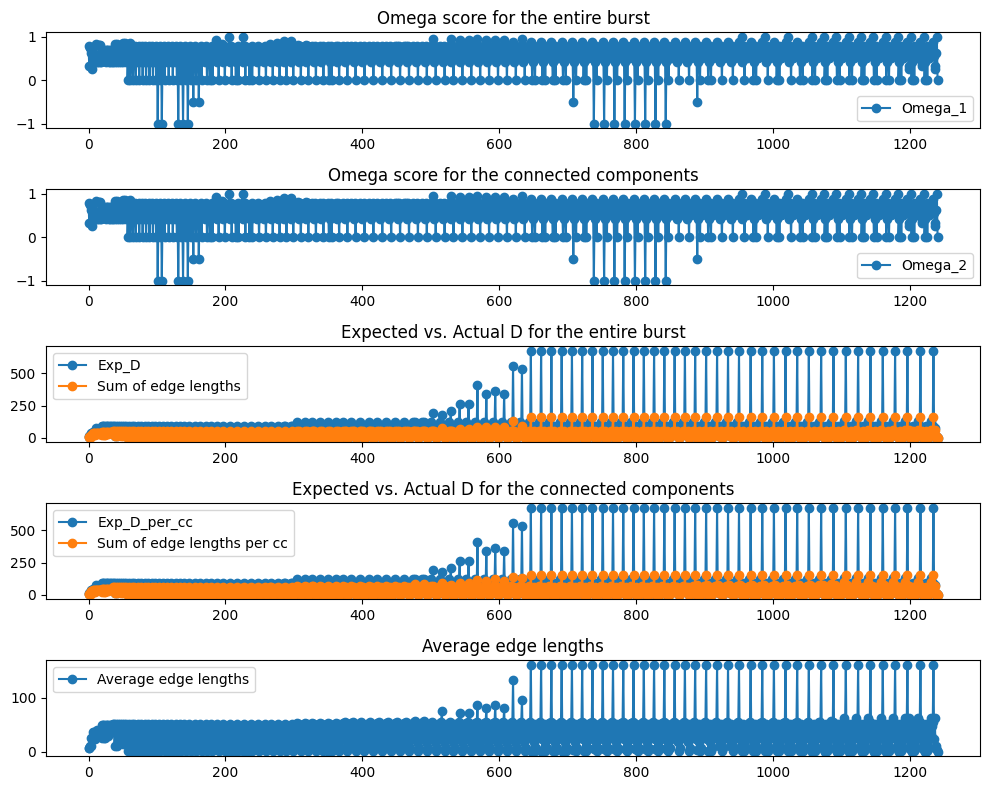

In [11]:
import matplotlib.pyplot as plt

# Unpacking the tuples into separate lists for each element
Omega_1, Omega_2, Dr_1, D, Dr_2, Dr_2_actual = zip(*info)

# Plotting each element on a separate subplot, combining Exp_D and Sum of edge lengths on the same plots for comparison
fig, axs = plt.subplots(5, 1, figsize=(10, 8))  # Reduced to 4 subplots

axs[0].plot(Omega_1, '-o', label='Omega_1')
axs[0].set_title('Omega score for the entire burst')
axs[0].legend()

axs[1].plot(Omega_2, '-o', label='Omega_2')
axs[1].set_title('Omega score for the connected components')
axs[1].legend()

# Combining Exp_D and Sum of edge lengths for the entire burst on the same subplot
axs[2].plot(Dr_1, '-o', label='Exp_D')
axs[2].plot(D, '-o', label='Sum of edge lengths')
axs[2].set_title('Expected vs. Actual D for the entire burst')
axs[2].legend()

# Combining Exp_D_per_cc and Sum of edge lengths per cc for the connected components on the same subplot
axs[3].plot(Dr_2, '-o', label='Exp_D_per_cc')
axs[3].plot(Dr_2_actual, '-o', label='Sum of edge lengths per cc')
axs[3].set_title('Expected vs. Actual D for the connected components')
axs[3].legend()

axs[4].plot(edge_lengths, '-o', label='Average edge lengths')
axs[4].set_title('Average edge lengths')
axs[4].legend()

plt.tight_layout()
plt.show()